# Data Loading

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/enron-email-dataset/emails.csv
/kaggle/input/other-files/dataset_comp3/tester.py
/kaggle/input/other-files/dataset_comp3/feature_format.py
/kaggle/input/other-files/dataset_comp3/final_project_dataset.pkl


In [2]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.chdir('../input/enron-email-dataset')

In [4]:
import os
email = pd.read_csv('emails.csv')
email.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [5]:
os.listdir('../other-files/dataset_comp3')

['tester.py', 'feature_format.py', 'final_project_dataset.pkl']

In [6]:
for i in os.listdir("../other-files/dataset_comp3/"):
    try:
        df = pd.read_pickle('../other-files/dataset_comp3/'+i, compression=None)
        print(i, ", SHAPE:", df.shape, ", SIZE: {:,} bytes".format(sys.getsizeof(df)))
        del df
    except Exception as e:
        print(i, "::Error loading file", repr(e))

tester.py ::Error loading file UnpicklingError("invalid load key, '#'.")
feature_format.py ::Error loading file UnpicklingError("invalid load key, '#'.")
final_project_dataset.pkl ::Error loading file UnpicklingError('the STRING opcode argument must be quoted')


The .pkl files wont open directly using pandas read_pickle

The second issue (STRING opcode argument) is because the file doesn't have Unix line endings. You need to run the pkl file through a script to convert them.

In [11]:
# Execute 2 times
os.chdir('..')

In [12]:
os.listdir()

['lib', 'input', 'working']

In [13]:
"""
convert dos linefeeds (crlf) to unix (lf)
usage: dos2unix.py 
"""
original = "input/other-files/dataset_comp3/final_project_dataset.pkl"
destination = "final_project_dataset_unix.pkl"

content = ''
outsize = 0
with open(original, 'rb') as infile:
    content = infile.read()
with open(destination, 'wb') as output:
    for line in content.splitlines():
        outsize += len(line) + 1
        output.write(line + str.encode('\n'))

In [14]:
dataset = pickle.load(open("final_project_dataset_unix.pkl", "rb"))
data = np.asanyarray(dataset)
data

array({'METTS MARK': {'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'loan_advances': 'NaN', 'bonus': 600000, 'email_address': 'mark.metts@enron.com', 'restricted_stock_deferred': 'NaN', 'deferred_income': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'from_poi_to_this_person': 38, 'exercised_stock_options': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'long_term_incentive': 'NaN', 'shared_receipt_with_poi': 702, 'restricted_stock': 585062, 'director_fees': 'NaN'}, 'BAXTER JOHN C': {'salary': 267102, 'to_messages': 'NaN', 'deferral_payments': 1295738, 'total_payments': 5634343, 'loan_advances': 'NaN', 'bonus': 1200000, 'email_address': 'NaN', 'restricted_stock_deferred': 'NaN', 'deferred_income': -1386055, 'total_stock_value': 10623258, 'expenses': 11200, 'from_poi_to_this_person': 'NaN', 'exercised_stock_options': 6680544, 'from_messages': 'NaN', 'other': 2660303, 'from_this_person_to_poi'

In [15]:
""""
    A general tool for converting data from the dictionary format to an (n x k) python list that's ready for training an sklearn algorithm

    n--no. of key-value pairs in dictonary
    k--no. of features being extracted

    dictionary keys are names of persons in dataset
    dictionary values are dictionaries, where each key-value pair in the dict is the name of a feature, and its value for that person

    In addition to converting a dictionary to a numpy array, you may want to separate the labels from the features this is what targetFeatureSplit is for

    so, if you want to have the poi label as the target, and the features you want to use are the person's salary and bonus, here's what you would do:

    feature_list = ["poi", "salary", "bonus"] 
    data_array = featureFormat( data_dictionary, feature_list )
    label, features = targetFeatureSplit(data_array)

    the line above (targetFeatureSplit) assumes that the label is the _first_ item in feature_list--very important that poi is listed first!
"""""

def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print("error: key ", feature, " not present")
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)

In [16]:
def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from featureFormat, separate out the first feature and put it into its own list (this should 
        be the quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features

In [17]:
feature_list = ["poi", "salary", "bonus"] 
data_array = featureFormat( dataset, feature_list )
label, features = targetFeatureSplit(data_array)
print(label)

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]


# Visualization

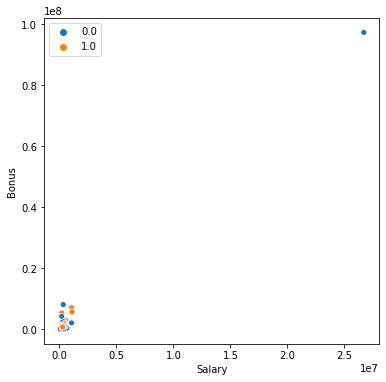

In [18]:
xx1 = featureFormat(dataset,['poi','salary','bonus'])
plt.figure(figsize = (6,6))
# scatter plot between salary and bonus
sns.scatterplot(xx1[:,1], xx1[:,2], hue = xx1[:,0])
plt.xlabel('Salary')
plt.ylabel('Bonus')
plt.show()

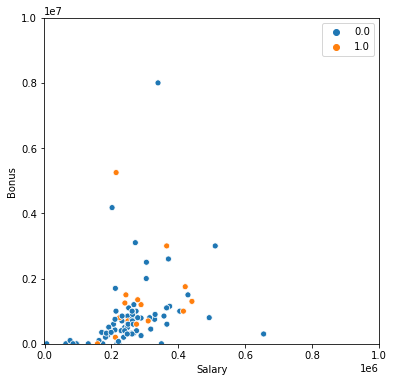

In [19]:
# magnifying the plot to exclude the outlier
plt.figure(figsize = (6,6))
sns.scatterplot(xx1[:,1], xx1[:,2], hue = xx1[:,0])
plt.xlabel('Salary')
plt.ylabel('Bonus')
plt.ylim(-1000,10000000)
plt.xlim(-1000,1000000)
plt.show()

In [50]:
# defining other features and labels for more visualization
xx = []
xx.append(featureFormat(dataset,['poi','salary','total_payments','deferral_payments']))
xx.append(featureFormat(dataset,['poi','salary','bonus','deferral_payments']))
xx.append(featureFormat(dataset,['poi','salary','bonus','deferred_income']))
xx.append(featureFormat(dataset,['poi','salary','total_payments','deferred_income']))
#xx.append(featureFormat(dataset,['poi','salary','expenses']))

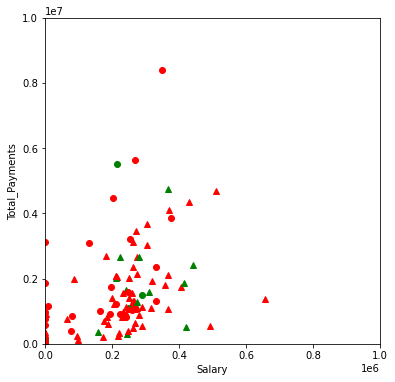

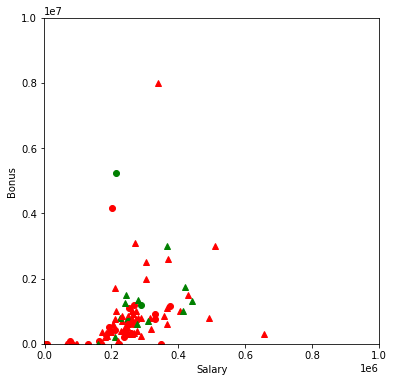

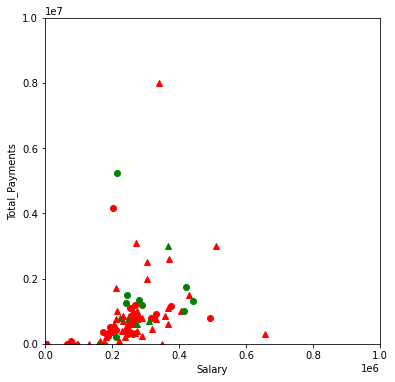

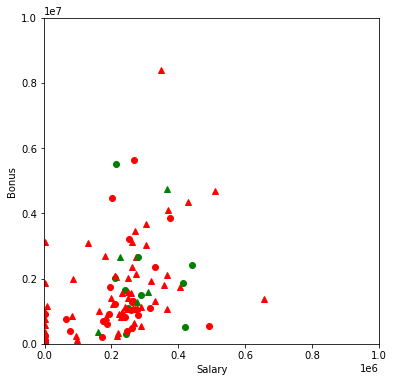

In [49]:
for i in range(4):
    plt.figure(figsize = (6,6))
    for j in range(len(xx[i])):
        if xx[i][j][0] == 1:
            if xx[i][j][3] == 0:
                plt.plot(xx[i][j][1],xx[i][j][2],'g^')
            else: 
                plt.plot(xx[i][j][1],xx[i][j][2],'go')
        else:
            if xx[i][j][3] == 0:
                plt.plot(xx[i][j][1],xx[i][j][2],'r^')
            else:
                plt.plot(xx[i][j][1],xx[i][j][2],'ro')
        plt.ylim(-1000,10000000)
        plt.xlim(-1000,1000000)             
        plt.xlabel("Salary")
        if(i == 0 or i == 2):
            plt.ylabel("Total_Payments")
        else:
            plt.ylabel("Bonus")
        plt.show            

# Feature Extraction

In [51]:
def dict_to_list(key,normalizer):
    feature_list=[]

    for i in dataset:
        if dataset[i][key]=="NaN" or dataset[i][normalizer]=="NaN":
            feature_list.append(0.)
        elif dataset[i][key]>=0:
            feature_list.append(float(dataset[i][key])/float(dataset[i][normalizer]))
    return feature_list

fraction_from_poi_email=dict_to_list("from_poi_to_this_person","to_messages")
fraction_to_poi_email=dict_to_list("from_this_person_to_poi","from_messages")
p = 0
for i in dataset:
    dataset[i]["fraction_from_poi_email"]=fraction_from_poi_email[p]
    dataset[i]["fraction_to_poi_email"]=fraction_to_poi_email[p]
    p=p+1

# Fitting Models

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [53]:
feature_list = ['poi','shared_receipt_with_poi','fraction_from_poi_email','fraction_to_poi_email',"deferral_payments"]
data_array = featureFormat(dataset, feature_list)
labels, features = targetFeatureSplit(data_array)
X_train, X_test, Y_train, Y_test = train_test_split(features, labels,test_size=0.3,random_state=42)

In [54]:
clf1 = GaussianNB()
clf1.fit(X_train,Y_train)
pred = clf1.predict(X_test)
acc = metrics.accuracy_score(pred,Y_test)
print("Accuracy by GaussianNB classifier: ",acc)

Accuracy by GaussianNB classifier:  0.22580645161290322


In [55]:
clf2=RandomForestClassifier()
clf2.fit(X_train,Y_train)
pred2 = clf2.predict(X_test)
acc2 = metrics.accuracy_score(pred2,Y_test)
print("Accuracy by RandomForestClassifier:",acc2)

Accuracy by RandomForestClassifier: 0.967741935483871


In [56]:
clf3 = KNeighborsClassifier(n_neighbors=6)
clf3.fit(X_train,Y_train)
pred3 = clf3.predict(X_test)
acc3 = metrics.accuracy_score(pred3, Y_test)
print("Accuracy by KNN classifier: ",acc3)

Accuracy by KNN classifier:  0.9354838709677419


In [57]:
clf4 = tree.DecisionTreeClassifier()
clf4 = clf4.fit(X_train, Y_train)
pred4 = clf4.predict(X_test)
acc = metrics.accuracy_score(pred4,Y_test)
print("Accuracy by DecesionTree classifier: ",acc3)

Accuracy by DecesionTree classifier:  0.9354838709677419


Comparing accuracies of the classifiers it can be seen that Random forest has maximum accuracy. hence the final prediction will be made using the Random Forest Classifier 

# Output

In [58]:
pickle.dump(clf2, open("my_classifier.pkl", "wb") )
pickle.dump(dataset, open("my_dataset.pkl", "wb") )
pickle.dump(feature_list, open("my_feature_list.pkl", "wb") )
os.listdir()

['my_classifier.pkl',
 'my_dataset.pkl',
 'lib',
 'input',
 'final_project_dataset_unix.pkl',
 'working',
 'my_feature_list.pkl']